In [513]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic regression

In [514]:
data1 = np.loadtxt('data/ex2data1.txt', delimiter=',')

### Visualise the dataset

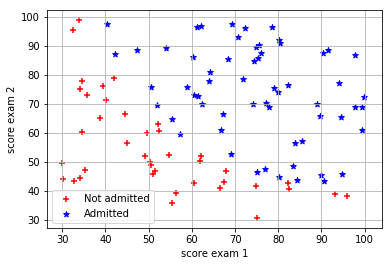

In [515]:
data1_0 = data1[np.where( data1[:,2] == 0)]
data1_1 = data1[np.where( data1[:,2] == 1)]
#plt.scatter( data1[:,0], data1[:,1], c=data1[:,2])
plt.scatter( data1_0[:,0], data1_0[:,1], c='r', marker='+', label='Not admitted')
plt.scatter( data1_1[:,0], data1_1[:,1], c='b', marker='*', label='Admitted')
plt.xlabel('score exam 1')
plt.ylabel('score exam 2')
plt.grid(True)
plt.legend()
plt.show()

### Logistic regression hypotesis: the sigmoid function

In [516]:
def sigmoid(t, x):
    return 1 / ( 1 + np.exp( - np.dot(x, t)))

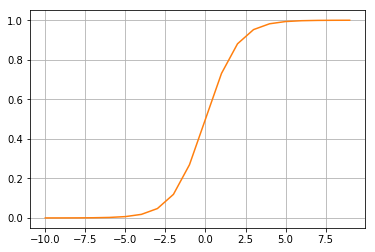

In [517]:
xx = np.array( [np.arange(-10,10,1)])
xx = np.insert(xx,0,1,axis=0).T
plt.plot( xx, sigmoid(np.diag((2,1)), xx))
plt.grid(True)
plt.show()

### Cost function and gradient

In [520]:
X = np.array(data1[:,:-1])
X = np.insert(X,0,1,axis=1)
y = np.array(data1[:,-1:])
#print sigmoid( np.zeros((X.shape[1],1)), X).shape
#print X.shape
#print y.shape

In [521]:
def cost_function(t, x, y):
    # t: [m, 1]
    # x: [n, m]
    # y: [n, 1]
    # sigmoid: [n,1]
    return float(
        (1./len(x)) * (np.dot(-y.T, np.log(sigmoid(t,x))) - np.dot((1-y).T, np.log(1 - sigmoid(t,x)))))

In [526]:
print "Cot function with initial parameter: %.2f" % cost_function(np.zeros((X.shape[1],1)), X, y)

Cot function with initial parameter: 0.69


In [522]:
from scipy import optimize
theta = np.zeros((X.shape[1],1))
result = optimize.fmin(cost_function, x0=theta, args=(X, y), maxiter=400, full_output=True)
theta = np.array([result[0]]).T

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [523]:
print result

(array([-25.16130062,   0.20623142,   0.20147143]), 0.2034977015902151, 157, 287, 0)


### Evaluate results

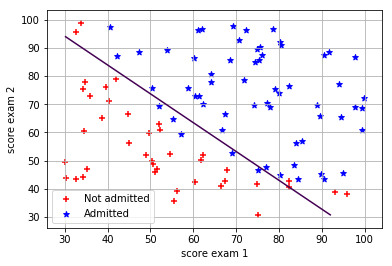

In [524]:
data1_0 = data1[np.where( data1[:,2] == 0)]
data1_1 = data1[np.where( data1[:,2] == 1)]

x_min, x_max = X[:, 1].min(), X[:, 1].max()
y_min, y_max = X[:, 2].min(), X[:, 2].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

Z = np.array([ sigmoid( theta , np.array([1,xx0,yy0]) ) for xx0,yy0 in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5])


#plt.scatter( data1[:,0], data1[:,1], c=data1[:,2])
plt.scatter( data1_0[:,0], data1_0[:,1], c='r', marker='+', label='Not admitted')
plt.scatter( data1_1[:,0], data1_1[:,1], c='b', marker='*', label='Admitted')
plt.xlabel('score exam 1')
plt.ylabel('score exam 2')
plt.grid(True)
plt.legend()

plt.show()

In [525]:
print "Exam 1: %d, Exam 2: %d, Admission probability: %.2f" % (45, 85, sigmoid(theta , np.array([1,45,85])))

Exam 1: 45, Exam 2: 85, Admission probability: 0.78


In [536]:
qual = (np.round(sigmoid(theta, X)) - y)
unique, counts = np.unique(qual, return_counts=True)
d = dict(zip(unique, 100*counts/float(len(X))))
# -1 : false non admitted
#  0 : correct prediction
#  1 : false admitted
print "False non admitted : %d %%" % d[-1]
print "False admitted     : %d %%" % d[1]
print "Correct prediction : %d %%" % d[0]

False non admitted : 5 %
False admitted     : 6 %
Correct prediction : 89 %


### Validate model with scikit-learn linear regression implementation

In [255]:
from sklearn import linear_model 
logi=linear_model.LogisticRegression(C=1e5)
logi.fit(data1[:,:-1],data1[:,-1:])
print "Scikit-learn parameter at minimum: (%.2f , %.2f, %.2f)" % (float(logi.intercept_), 
                                                                  float(logi.coef_[:,0]), 
                                                                  float(logi.coef_[:,1]))

Scikit-learn parameter at minimum: (-24.95 , 0.20, 0.20)


In [543]:
print "Exam 1: %d, Exam 2: %d, Admission probability: %.2f" % (45, 85, logi.predict_proba([[45,85]])[:,1])

Exam 1: 45, Exam 2: 85, Admission probability: 0.77


In [546]:
print "Correct prediction : %d %%" % (logi.score(data1[:,:-1],data1[:,-1:])*100.)

Correct prediction : 89 %


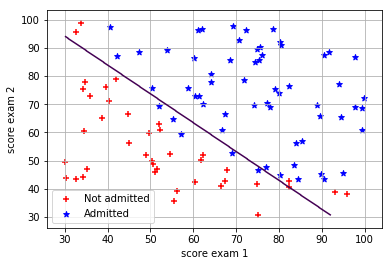

In [258]:
data1_0 = data1[np.where( data1[:,2] == 0)]
data1_1 = data1[np.where( data1[:,2] == 1)]

x_min, x_max = X[:, 1].min(), X[:, 1].max()
y_min, y_max = X[:, 2].min(), X[:, 2].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = logi.predict( np.c_[np.c_[xx.ravel(), 
                              yy.ravel()]])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5])

#plt.scatter( data1[:,0], data1[:,1], c=data1[:,2])
plt.scatter( data1_0[:,0], data1_0[:,1], c='r', marker='+', label='Not admitted')
plt.scatter( data1_1[:,0], data1_1[:,1], c='b', marker='*', label='Admitted')
plt.xlabel('score exam 1')
plt.ylabel('score exam 2')
plt.grid(True)
plt.legend()

plt.show()

# Regularized logistic regression

In [549]:
data2 = np.loadtxt('data/ex2data2.txt', delimiter=',')

### Visualise the dataset

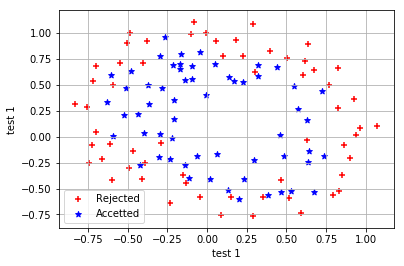

In [550]:
data2_0 = data2[np.where( data2[:,2] == 0)]
data2_1 = data2[np.where( data2[:,2] == 1)]

plt.scatter(data2_0[:,0], data2_0[:,1], c='r', marker='+', label='Rejected')
plt.scatter(data2_1[:,0], data2_1[:,1], c='b', marker='*', label='Accetted')
plt.xlabel('test 1')
plt.ylabel('test 1')
plt.grid(True)
plt.legend()
plt.show()

### Feature mapping

In [551]:
X = data2[:,:-1]
X = np.insert(X,0,1,axis=1)
y = data2[:,-1:]

In [552]:
# This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [553]:
mapX = mapFeature(X[:,1:2], X[:,2:3])

In [554]:
# cost function with the additional regularization term
def cost_function(t, x, y, l=0):
    # t: [m, 1]
    # x: [n, m]
    # y: [n, 1]
    # sigmoid: [n,1]
    # l: regularization term
    return float(
        (1./len(x)) * (
            np.dot(-y.T, np.log(sigmoid(t,x))) 
            - np.dot((1-y).T, np.log(1 - sigmoid(t,x))) 
            + (l/2) * np.sum(np.dot(t[1:].T, t[1:]))
        )
   )

In [590]:
print "Cost function with initial parameter: %.2f" % cost_function(np.zeros((mapX.shape[1],1)), mapX, y, 0.)

Cost function with initial parameter: 0.69


In [556]:
def minimize_cost(theta_, x_, y_, l_ = 0):
    from scipy import optimize
    #theta = np.zeros((mapX.shape[1],1))
    result = optimize.minimize(cost_function, x0=theta_, args=(x_, y_, l_), method='BFGS', options={'maxiter':1000, 'disp':True})
    return np.array([result.x]).T, result.fun

In [558]:
theta, cost = minimize_cost(np.zeros((mapX.shape[1],1)), mapX, y,0.)

         Current function value: 0.240750
         Iterations: 1000
         Function evaluations: 32400
         Gradient evaluations: 1080


### Evaluate results

In [559]:
def plot_data(X_, y_):
    
    X_0 = mapX[np.where( data2[:,2] == 0),1]
    X_1 = mapX[np.where( data2[:,2] == 0),2]
    plt.scatter(data2_0[:,0], data2_0[:,1], c='r', marker='+', label='Rejected')
    plt.scatter(data2_1[:,0], data2_1[:,1], c='b', marker='*', label='Accetted')
    plt.xlabel('test 1')
    plt.ylabel('test 1')
    plt.grid(True)
    plt.legend()

def plot_boundary(theta_, X_, y_, lambda_):
    
    data2_0 = data2[np.where( data2[:,2] == 0)]
    data2_1 = data2[np.where( data2[:,2] == 1)]
    
    theta_, cost = minimize_cost( theta_, X_, y_, lambda_)
    
    x_min, x_max = X[:, 1].min(), X[:, 1].max()
    y_min, y_max = X[:, 2].min(), X[:, 2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    Z = np.array( [np.dot( theta_.T, mapFeature( np.array([xx0]), np.array([yy0])).T ) for xx0,yy0 in zip(np.ravel(xx), np.ravel(yy))]) 
    
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, [0])
    plt.title('Decision boundary, Lambda = %d' % lambda_)
    

Optimization terminated successfully.
         Current function value: 0.238106
         Iterations: 594
         Function evaluations: 18990
         Gradient evaluations: 633
Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 660
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 240
         Gradient evaluations: 8


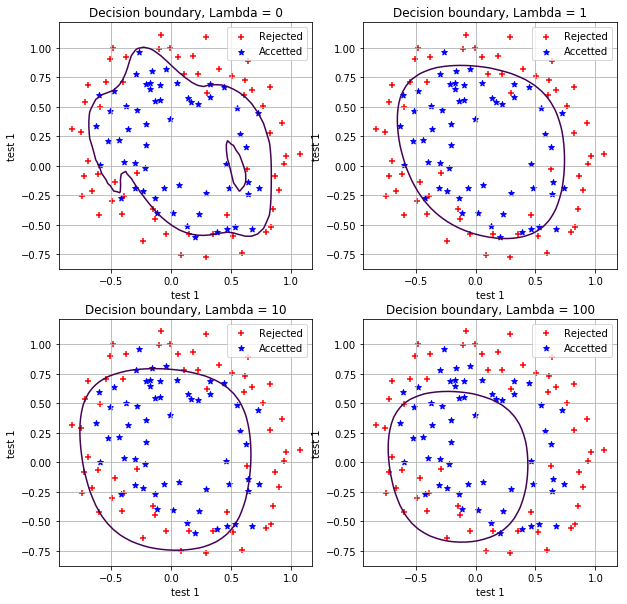

In [599]:
# Without a regularization term, the model tends to overfit the data
# With a to big regularizatio nterm, the model tends to underfit the data 

plt.figure( figsize=(10,10))

plt.subplot(221)
plot_data(mapX, y)
plot_boundary(np.zeros((mapX.shape[1],1)), mapX, y, 0.)

plt.subplot(222)
plot_data(mapX, y)
plot_boundary(np.zeros((mapX.shape[1],1)), mapX, y, 1.)

plt.subplot(223)
plot_data(mapX, y)
plot_boundary(np.zeros((mapX.shape[1],1)), mapX, y, 10.)

plt.subplot(224)
plot_data(mapX, y)
plot_boundary(np.zeros((mapX.shape[1],1)), mapX, y, 100.)

plt.show()

### Validate model with scikit-learn linear regression implementation

In [600]:
def skvalid(lambda_ = 0.):

    from sklearn import linear_model 

    # the sklearn model implement C as the inverse of the regularization term
    logi=linear_model.LogisticRegression(C=1/lambda_)
    logi.fit(mapX,y)
    
    data2_0 = data2[np.where( data2[:,2] == 0)]
    data2_1 = data2[np.where( data2[:,2] == 1)]
    
    x_min, x_max = X[:, 1].min(), X[:, 1].max()
    y_min, y_max = X[:, 2].min(), X[:, 2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = logi.predict( np.c_[np.c_[mapFeature(xx.ravel(), 
                                  yy.ravel())]])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, [0])
    
    #plt.scatter( data1[:,0], data1[:,1], c=data1[:,2])
    plt.scatter( data2_0[:,0], data2_0[:,1], c='r', marker='+', label='Not admitted')
    plt.scatter( data2_1[:,0], data2_1[:,1], c='b', marker='*', label='Admitted')
    plt.xlabel('score exam 1')
    plt.ylabel('score exam 2')
    plt.title('Decision boundary, Lambda = %d' % lambda_)
    plt.grid(True)
    plt.legend()

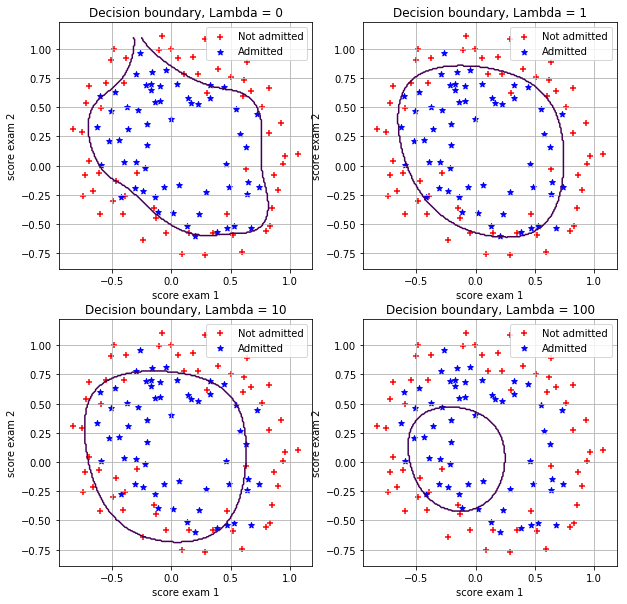

In [601]:
plt.figure( figsize=(10,10))
plt.subplot(221)
skvalid(0.00001)
plt.subplot(222)
skvalid(1.)
plt.subplot(223)
skvalid(10.)
plt.subplot(224)
skvalid(100.)

plt.show()